In [79]:
# Домашнее задание к лекции «Корреляция и корреляционный анализ»

# Возьмите датасет Mortality and Water Hardness**
# https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness

# В этом датасете содержатся данные по средней годовой смертности на
# 100000 населения и концентрации кальция в питьевой воде для 61
# большого города в Англии и Уэльсе. Города дополнительно поделены на
# северные и южные.

# Задание 1.
# Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    # Построить точечный график
    # Рассчитать коэффициенты корреляции Пирсона и Спирмена
    # Построить модель линейной регрессии
    # Рассчитать коэффициент детерминации
    # Вывести график остатков

# Задание 2.
# Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    # Разделить данные на 2 группы
    # Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
# Задание 1
df = pd.read_csv('./hw_4/water.csv') # загружаю датафрейм и смотрю общую информацию
df.head(1)
# df.info()
# df.describe()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105


<AxesSubplot: xlabel='hardness', ylabel='mortality'>

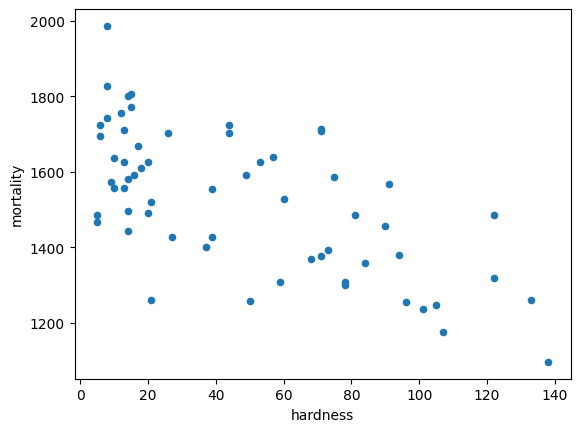

In [82]:
# точечный график, просматривается обратная корреляция между жёсткостью воды и смертностью
df.plot(kind='scatter', x='hardness', y='mortality')

In [83]:
# рассчитываю корреляцию по Пирсону
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [84]:
# рассчитываю корреляцию по Спирмену
df[['hardness', 'mortality']].corr(method='spearman')
# корреляции по обоим методам очень похожи

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [85]:
# рассчитываю корреляцию по Кендаллу, она сильно ниже
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [86]:
# строю линейную регрессию
X = df[['hardness']]
y = df[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
X_test.shape
# y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты


LinearRegression()

In [87]:
coef_ = model.coef_
intercept_ = model.intercept_
print(coef_, intercept_)

[[-2.7863345]] [1644.68440197]


In [88]:
# строю предсказание
y_pred = model.predict(X_test)
y_pred

array([[1602.8893844 ],
       [1536.01735629],
       [1572.23970485],
       [1427.35031061],
       [1427.35031061],
       [1497.00867323],
       [1600.10304989],
       [1627.96639494],
       [1588.95771188],
       [1260.17024034],
       [1382.76895854],
       [1274.10191286],
       [1418.9913071 ],
       [1508.15401124],
       [1522.08568377],
       [1611.24838791],
       [1622.39372593],
       [1536.01735629],
       [1485.86333521]])

In [89]:
# строю коэф. детерминации
model.score(X_test, y_test) 

0.6199236392917277

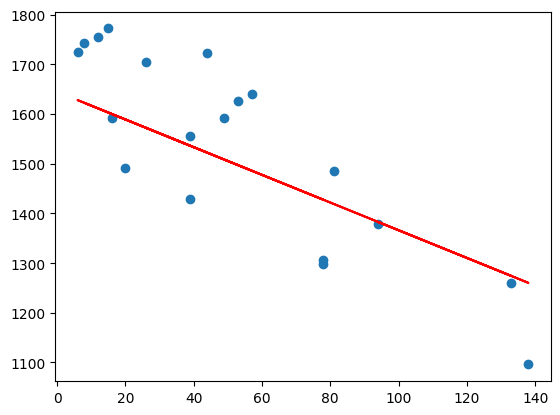

In [90]:
# смотрю на графике
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Вывод - есть обратная корреляция между жёсткостью воды и смертностью.

In [94]:
# Задание 2
# делю датафрейм на группы
dfs = df[df['location']=='South'].copy()
dfn = df[df['location']=='North'].copy()

<AxesSubplot: xlabel='hardness', ylabel='mortality'>

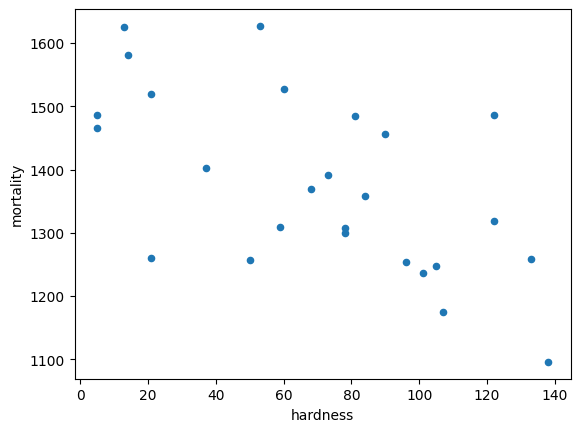

In [95]:
dfs.plot(kind='scatter', x='hardness', y='mortality') # график юг

<AxesSubplot: xlabel='hardness', ylabel='mortality'>

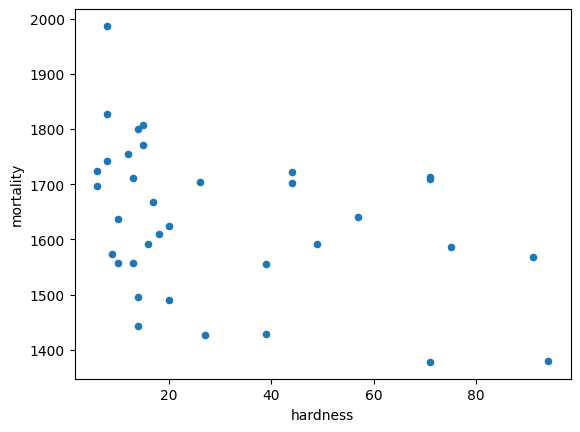

In [96]:
dfn.plot(kind='scatter', x='hardness', y='mortality') # график север

In [125]:
# считаю корреляцию двумя методами для юга и севера
# корреляция в южных городах выражена более ярко
sp = dfs[['hardness', 'mortality']].corr().loc['hardness','mortality']
ss = dfs[['hardness', 'mortality']].corr(method='spearman').loc['hardness','mortality']
np = dfn[['hardness', 'mortality']].corr().loc['hardness','mortality']
ns = dfn[['hardness', 'mortality']].corr(method='spearman').loc['hardness','mortality']
print(f"South_Pierce: {sp}\nSouth_Spearman: {ss}\nNorth_Pierce: {np}\nNorth_Spearman: {ns}")

South_Pierce: -0.6021532715484159
South_Spearman: -0.5957229185013566
North_Pierce: -0.36859783832887155
North_Spearman: -0.4042078956511175


In [129]:
# строю линейную регрессию для юга
X = dfs[['hardness']]
y = dfs[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
X_test.shape
# y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
y_pred = model.predict(X_test)

In [127]:
# строю коэф. детерминации юг
model.score(X_test, y_test) 

-0.43909708838372974

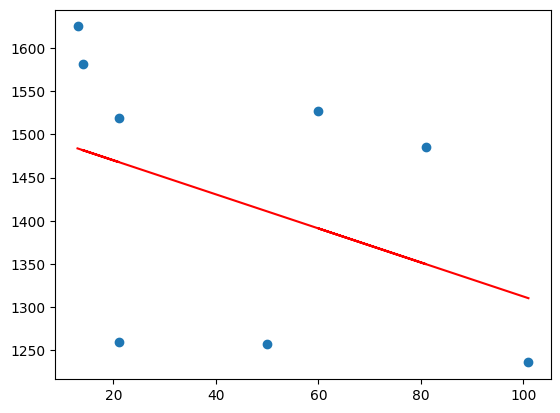

In [130]:
# смотрю на графике юг
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [131]:
# строю линейную регрессию для севера
X = dfn[['hardness']]
y = dfn[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
X_test.shape
# y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
y_pred = model.predict(X_test)

In [135]:
# строю коэф. детерминации юг
model.score(X_test, y_test) 

0.0003571539072300123

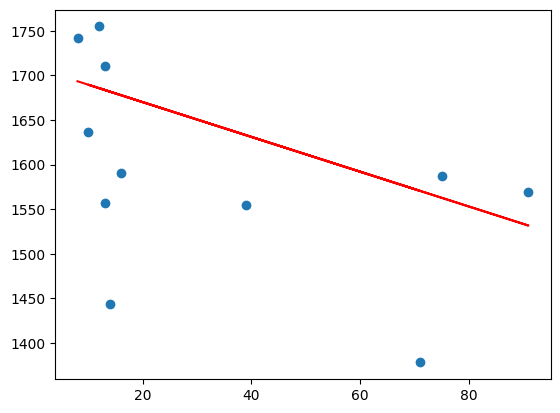

In [134]:
# смотрю на графике юг
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [137]:
# Вывод - обратная корреляция жёсткости воды и смертности прослеживается, в основном, за счёт южных городов. На севере такой взаимосвязи практически нет.